# Project: Investigate The Movie Database (TMDB) Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

Let me introduce you my investigation of TMDB Data.

Personally I'm very interested in movies & series. Therefore it's my intentiton to explore & analyze this dataset of movies and answer some questions that I will show in a few lines below.


## Description of the dataset

First of all, the data itself belongs to the official website of The Movie Database (TMDB) with the url: https://www.themoviedb.org

The raw dataset contains more than 10,000 movies, including user ratings, budget, revenue, director, actor, genre etc. that I will also show you in a few line below.

It comes with a detailed shape of 10866 rows and 21 columns.



## Questions that will be answered:

1. **Do the films with the highest budgets also bring in a high revenue? And what's about the winnings?**
    
    a) What are the most top10 movies with the highest budgets?
    
    b) What are the most top 10 movies with the highest revenues?
    
    c) What are the most top 10 movies with the highest winnings?
    
    d) What are the most top 10 movies with the lowest winnings?
    
    e) What are the average budgets, revenues and winnings by years?
    
    f) Is there a correlation between budgets and revenues?
    
    g) Is there a correlation between budgets and winnings?
    
    h) Is there a correlation winnings and revenues?
    
    
2. **Does the genre of a movie affect it's running time?**
    
    a) What are the average running times of films over the years?
    
    b) How is the distribution of the genres regarding to the movies?
    
    c) What is the distribution of runtimes regarding to the different genres?
    
    
3. **Which specific genres brings the most winnings?**

     a) What are the budgets of movies by genres?

     b) What are the revenues of movies by genres?

     c) How big are the budgets and revenues of each movie by genres?

     d) How big are the winnings and revenues of each movie by genres?

     e) Does the revenues also got a strong correlation to winnings by movie genres?


4. **Bonus Questions:**

     4.1 What are the characteristics of the most casted actor?

        a) What are the top 10 actors?

        b) Was he only in high-budget films during his career?

        c) What is the distribution of Robert De Niro's average votings for his movies?

        d) What are the mean average votings from Robert De Niro by different movie budget classes?
       
     4.2 What is the distribution ov movie runtimes within their runtime labels?

     4.3 What is the distribution of movie voting counts labels?

     4.4 What is the distribution of rating classes groubpy voting counts labels?
     
     4.5 Who are the top 20 production companies of movies with "many" counted votes and a "premium" budget? 

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

<a id='wrangling'></a>
# Data Wrangling

## General Properties

In [2]:
# read in the csv-file and have a short preview at the data:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# looking for names, dtypes and missing data for each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Using info shows us, that we are talking about 10866 entries and 21 columns.

There are no spaces at the column names, but I will rename some of them for a shorter and better understanding. 

There are some missing data in a few columns like homepage or productions_companies for example.   
  Therefore we will get another view about the missing values in the next line of code. 

Looking at dtype gives us the hint, that we have to handle 3 different data types here (int64, float64 and object).   
  For example we should cast the column release_date from an object into a datetime for an easier use of different methods later. 

In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As we can see, there are different amounts of missing values in the specific columns, which we gonna have to handle in the data cleaning section.

In [5]:
# shows amount of duplicated rows:
print('Amount of duplicated rows: ',df.duplicated().sum())

Amount of duplicated rows:  1


In [6]:
# shows the duplicated row in detail:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
# double check the dubplicated row:
df[df['id']==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


There is also only one duplicated row in this dataset, that belongs to the id 42194, which we can clear in the next section.

## Data Cleaning

#### After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.
In this section, we are gonna clean our dataset with the following steps:

1. Delete all columns which are not relevant for our data analysis
2. Remove the duplicated row(s)
3. Change dtype of release_date from object into datetime
4. Handling of Nulls for each specific column
5. Additional / final short look at the statistics for additional outlier or not usefull values etc.
6. Rename and add additional column(s)
7. Change the numbers of columns budget, revenue, winnings into millions
8. Reorder all columns

In [8]:
# 1. Delete all unrelevant columns:
not_relevant = ['imdb_id', 'popularity', 'homepage', 'tagline', 'overview', 'revenue_adj', 'budget_adj']
df.drop(not_relevant, axis = 1, inplace = True)

In [9]:
df.head()

,id,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


All unrelevant columns are gone now for our analysis.

In [10]:
# 2. Remove the cuplicated row which belongs to id 42194:
df.drop_duplicates(inplace = True)

In [11]:
df[df.duplicated()]

,id,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


Removing of duplicated rows is finished.

In [12]:
# 3. cast column release_date from obj into datetime:
df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   cast                  10789 non-null  object        
 5   director              10821 non-null  object        
 6   keywords              9372 non-null   object        
 7   runtime               10865 non-null  int64         
 8   genres                10842 non-null  object        
 9   production_companies  9835 non-null   object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

It changed the dtype of column relase_date from object into datetime64

In [14]:
# 4. Handling of Nulls for each specific column:
df.isnull().sum()

id                         0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

Ok there are some Nulls here. Let's have a short look insight of one column as an example

In [15]:
## getting a short insight in the column with the most NaN:
df[df['keywords'].isnull()]

,id,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
130,245706,0,4719695,True Story,Jonah Hill|James Franco|Felicity Jones|Maria D...,Rupert Goold,NaN,100,Crime|Drama|Mystery,Plan B Entertainment|Regency Enterprises|New R...,2015-04-17,354,6.0,2015
149,346808,20000000,0,Momentum,Olga Kurylenko|Morgan Freeman|James Purefoy|Je...,Stephen S. Campanelli,NaN,96,Thriller|Action,Thaba Media|Azari Media,2015-08-01,100,5.8,2015
154,314405,12000000,0,Il racconto dei racconti,Salma Hayek|Vincent Cassel|John C. Reilly|Toby...,Matteo Garrone,NaN,125,Romance|Fantasy|Horror,HanWay Films|Rai Cinema|Le Pacte|Fonds Eurimag...,2015-05-14,211,5.7,2015
155,282984,11000000,27391084,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,NaN,95,Mystery|Drama,Sony Pictures|Gravier Productions,2015-07-17,319,6.1,2015
160,304372,12000000,60273173,The Perfect Guy,Michael Ealy|Sanaa Lathan|Morris Chestnut|Kath...,David M. Rosenthal,NaN,100,Drama|Thriller,Screen Gems,2015-09-11,122,5.6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10753,19307,0,0,Carry On Camping,Sid James|Charles Hawtrey|Joan Sims|Kenneth Wi...,Gerald Thomas,NaN,88,Comedy,The Rank Organisation,2069-05-29,11,6.4,1969
10777,28932,11,11,F.I.S.T.,Sylvester Stallone|Rod Steiger|Peter Boyle|Mel...,Norman Jewison,NaN,145,Drama|Action,chateau productions,1978-04-26,13,6.7,1978
10787,14822,0,16393000,Return From Witch Mountain,Bette Davis|Christopher Lee|Kim Richards|Ike E...,John Hough,NaN,95,Adventure|Fantasy|Science Fiction|Family,NaN,1978-03-10,22,5.8,1978
10811,40081,0,0,Can que,Chen Kuan-Tai|Philip Kwok Chun-Fung|Lo Meng|Su...,Chang Cheh,NaN,100,Action|Drama|Foreign,Shaw Brothers,1978-12-20,11,7.5,1978


After a little insight of NaN data for each column (column 'keywords' above is still left as an review example), it's getting clear, that only columns with dtype as an object need to be deleted or replaced.   
  I chose to replace it with the word 'Unknown' to keep the high amount of the data basic and filter it out when it's might getting necessary in some cases later.   
  Note: Under real condition in my work, I would like to search for another Dataset with the missing values and join them.

In [16]:
## Changing NaN into 'Unknown':
df.fillna('Unknown', inplace = True)
df.isnull().sum()

id                      0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

Now it looks better with the Nulls.

In [17]:
# 5. Additional short look at the statistics of each column:
df.describe()

,id,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


Noticeable are here the columns budget, revenue and runtime. All three of them still got minimum amounts of 0.   
  That is one topic we should analyse in a more detailed way.

Another point is, that there is a maximum runtime value of 900 minutes. 
And that's not usual at all for a movie.
So lets also have a look at this one.


In [18]:
## short insight of the column budget with the value of 0:
### amount of rows:
print('The amount of rows with 0 budget in this dataset: ', len(df[df['budget'] == 0].index))

### percentage calculation:
df_0_budget = df.query('budget == 0')
percent_0_budget= (len(df_0_budget.index))*100/(len(df.index))

print('Percentage of movies with 0 budget in this dataset: {:.2f}%'.format(percent_0_budget))

The amount of rows with 0 budget in this dataset:  5696
Percentage of movies with 0 budget in this dataset: 52.43%


In [19]:
## short insight of the column revenue with the value of 0:
### amount of rows:
print('The amount of rows with 0 revenue in this dataset: ', len(df[df['revenue'] == 0].index))

### percentage calculation:
df_0_revenue = df.query('revenue == 0')
percent_0_revenue= (len(df_0_revenue.index))*100/(len(df.index))

print('Percentage of movies with 0 revenue in this dataset: {:.2f}%'.format(percent_0_revenue))

The amount of rows with 0 revenue in this dataset:  6016
Percentage of movies with 0 revenue in this dataset: 55.37%


In [20]:
## short insight of the column runtime with the value of 0:
### amount of rows:
print('The amount of rows with 0 runtime in this dataset: ', len(df[df['runtime'] == 0].index))

### percentage calculation:
df_0_runtime = df.query('runtime == 0')
percent_0_runtime= (len(df_0_runtime.index))*100/(len(df.index))

print('Percentage of movies with 0 runtime in this dataset: {:.2f}%'.format(percent_0_runtime))
print('\n')


### on top movies without runtime and also no budget:
print('Amount of movies with 0 runtime and also 0 budget on top: ',len(df_0_runtime[df_0_runtime['budget'] == 0].index))

### perentage calculation:
df_0_run_bud = df_0_runtime.query('budget == 0')
percent_0_run_bud = (len(df_0_run_bud.index))*100/(len(df_0_runtime.index))

print('Percentage of movies with also 0 budget related to 0 runtime: {:.2f}%'.format(percent_0_run_bud))

The amount of rows with 0 runtime in this dataset:  31
Percentage of movies with 0 runtime in this dataset: 0.29%


Amount of movies with 0 runtime and also 0 budget on top:  28
Percentage of movies with also 0 budget related to 0 runtime: 90.32%


#### Conclusion to 0 budget, revenue and runtime: 

As we can see here is a really high percentage of not usefull data that belongs to budget and revenue. Usually I've got two cases right now:
1. case is to calculate the mean value for each column and replace it with them. 

2. case is to delete the rows. 

And in this analysis here, I decided to delete this rows, because otherwise I might bring in a different influence on the answers to the questions later and maybe force them to different statements.  

On top of that, there are only a few movies without a runtime. But most of them also got no budget either. So that's also the reason for me to delete them.

In [21]:
## insight of the one movie with a runtime of 900 minutes:
df[df['runtime'] == 900]

,id,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3894,125336,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,cinema|nouvelle vague|hindi cinema|cinema novo...,900,Documentary,Unknown,2011-09-03,14,9.2,2011


It seems like the movie with the longest runtime is a documentation about the story of films. The average vote is pretty high with 9.2 here, but only 14 votes were counted for this rating. And as we can see, there are no information about the budget and revenue either.

In [22]:
## drop all rows with 0 budget, 0 revenue or 0 runtime and reset the index again:
df = df.drop(df[(df.budget == 0) | (df.revenue == 0) | (df.runtime == 0)].index)
df.reset_index(drop = True, inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   budget                3854 non-null   int64         
 2   revenue               3854 non-null   int64         
 3   original_title        3854 non-null   object        
 4   cast                  3854 non-null   object        
 5   director              3854 non-null   object        
 6   keywords              3854 non-null   object        
 7   runtime               3854 non-null   int64         
 8   genres                3854 non-null   object        
 9   production_companies  3854 non-null   object        
 10  release_date          3854 non-null   datetime64[ns]
 11  vote_count            3854 non-null   int64         
 12  vote_average          3854 non-null   float64       
 13  release_year      

After dropping all rows with 0 budget, revenue and runtime there are only 3854 rows of data left.   
  Note: As I said before, in my work I would like to search for another dataset and join the 0 values to safe as many data rows as possible.

In [24]:
# Preperation for step 6. 
## create a function to calculate the different quantiles for a given column name in the next lines:
def bin_edges (column_name):
    result = []
    j = 0.25  
    for i in range(5):
        result.append((df[column_name]).quantile(j*i))
    return result

This little function helps us to shorten the repetitive code for classifying the dataset in different groups / labels in the next lines a little bit (and of course for my personal training with my own function)

In [25]:
# 6. Rename and add additional column(s):

## shorten column original_title:
df.rename(columns = {"original_title":"title"}, inplace = True)


## calculate and add column winnings:
df['winnings'] = df['revenue'] - df['budget']


## classify the dataset into 4 groups by user ratings:
bin_edges_rating = bin_edges('vote_average') # have a look at the new defined function in the last coding cell
bin_labels_rating = ['very low', 'low', 'medium', 'high']

df['rating_class'] = pd.cut(df['vote_average'], bin_edges_rating, labels = bin_labels_rating, include_lowest = True)
print('Create a new group of labels for user ratings:')
print(dict(zip(bin_labels_rating, bin_edges_rating)),'\n')


## classify the dataset into 4 groups by counted votes:
bin_edges_voting = bin_edges('vote_count')
bin_labels_voting = ['not relevant', 'few', 'middle', 'many']

df['vote_counts_class'] = pd.cut(df['vote_count'], bin_edges_voting, labels = bin_labels_voting, include_lowest = True)
print('Create a new group of labels for counted votes:')
print(dict(zip(bin_labels_voting, bin_edges_voting)),'\n')


## classify the dataset into 4 groups by movie runtimes:
bin_edges_runtime = [0, 30, 60, 120,df['runtime'].max()] # runtime categories from source: https://de.wikipedia.org/wiki/Filml%C3%A4nge
bin_labels_runtime = ['short film', 'medium-length film', 'feature-length film', 'over-length film']

df['runtime_class'] = pd.cut(df['runtime'], bin_edges_runtime, labels = bin_labels_runtime, include_lowest = True)
print('Create a new group of labels for movie runtimes:')
print(dict(zip(bin_labels_runtime, bin_edges_runtime)),'\n')


## classify the dataset into 4 groups by budget :
bin_edges_budget = bin_edges('budget')
bin_labels_budget = ['low', 'middle', 'higher', 'premium'] # no concrete source found here for budget criteria. So I use the different quantiles.

df['budget_class'] = pd.cut(df['budget'], bin_edges_budget, labels = bin_labels_budget, include_lowest = True)
print('Create a new group of labels for budget:')
print(dict(zip(bin_labels_budget, bin_edges_budget)),'\n')

Create a new group of labels for user ratings:
{'very low': 2.2, 'low': 5.7, 'medium': 6.2, 'high': 6.7} 

Create a new group of labels for counted votes:
{'not relevant': 10.0, 'few': 71.0, 'middle': 204.0, 'many': 580.0} 

Create a new group of labels for movie runtimes:
{'short film': 0, 'medium-length film': 30, 'feature-length film': 60, 'over-length film': 120} 

Create a new group of labels for budget:
{'low': 1.0, 'middle': 10000000.0, 'higher': 24000000.0, 'premium': 50000000.0} 



Alright, the additional labels are now also in the dataset for my personal references later.   
  I have presented them here in some short dictionaries as an example what numbers are behind the specific labels.

In [26]:
# 7. Change the numbers of columns budget, revenue, winnings into millions:
df['budget'] = df['budget'] / 1000000
df['revenue'] = df['revenue'] / 1000000
df['winnings'] = df['winnings'] / 1000000

The numbers are now better readable for the viewer, when the exponents are gone for example in the top 10 charts or in the diagrams.

In [27]:
# 8. Reorder all columns
columns_reorderd = ['id','title','release_year','release_date','runtime','runtime_class', 'director','cast','genres','vote_average','rating_class', 'vote_count', 'vote_counts_class', 'revenue','budget','winnings','budget_class','production_companies', 'keywords']
df = df.reindex(columns = columns_reorderd)
df.head()

,id,title,release_year,release_date,runtime,runtime_class,director,cast,genres,vote_average,rating_class,vote_count,vote_counts_class,revenue,budget,winnings,budget_class,production_companies,keywords
0,135397,Jurassic World,2015,2015-06-09,124,over-length film,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,6.5,medium,5562,many,1513.528810,150.0,1363.528810,premium,Universal Studios|Amblin Entertainment|Legenda...,monster|dna|tyrannosaurus rex|velociraptor|island
1,76341,Mad Max: Fury Road,2015,2015-05-13,120,feature-length film,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,7.1,high,6185,many,378.436354,150.0,228.436354,premium,Village Roadshow Pictures|Kennedy Miller Produ...,future|chase|post-apocalyptic|dystopia|australia
2,262500,Insurgent,2015,2015-03-18,119,feature-length film,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,6.3,medium,2480,many,295.238201,110.0,185.238201,premium,Summit Entertainment|Mandeville Films|Red Wago...,based on novel|revolution|dystopia|sequel|dyst...
3,140607,Star Wars: The Force Awakens,2015,2015-12-15,136,over-length film,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,7.5,high,5292,many,2068.178225,200.0,1868.178225,premium,Lucasfilm|Truenorth Productions|Bad Robot,android|spaceship|jedi|space opera|3d
4,168259,Furious 7,2015,2015-04-01,137,over-length film,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,7.3,high,2947,many,1506.249360,190.0,1316.249360,premium,Universal Pictures|Original Film|Media Rights ...,car race|speed|revenge|suspense|car


The dataset is cleaned and in the right order for my personal view.  
  So we can start with the EDA now.

<a id='eda'></a>
# Exploratory Data Analysis

## Question 1: Do the films with the highest budgets also bring in a high revenue? And what's about the winnings?

### What are the most top 10 movies with the highest budgets?

In [28]:
# show the top 10 movies with the highest budgets:
df_sorted = df.sort_values(by = 'budget', ascending = False)
df_top10_budget = df_sorted[['title','budget']].head(10)
df_top10_budget

,title,budget
682,The Warrior's Way,425.0
1103,Pirates of the Caribbean: On Stranger Tides,380.0
2588,Pirates of the Caribbean: At World's End,300.0
14,Avengers: Age of Ultron,280.0
2256,Superman Returns,270.0
528,Tangled,260.0
1533,John Carter,260.0
2595,Spider-Man 3,258.0
1931,The Lone Ranger,255.0
347,Harry Potter and the Half-Blood Prince,250.0


It's pretty amazing to see the pretty high budgets for such blockbuster movies.   
  In my personal view, I'm very suprised about the first place. Because it's the only movie of this top 10 list, I don't know and have not seen it.

### What are the most top 10 movies with the highest revenues?

In [29]:
# show the top 10 movies with the highest revenue:
df_sorted = df.sort_values(by = 'revenue', ascending = False)
df_top10_revenue = df_sorted[['title','revenue']].head(10)
df_top10_revenue

,title,revenue
344,Avatar,2781.505847
3,Star Wars: The Force Awakens,2068.178225
1767,Titanic,1845.034188
1488,The Avengers,1519.557910
0,Jurassic World,1513.528810
4,Furious 7,1506.249360
14,Avengers: Age of Ultron,1405.035767
1102,Harry Potter and the Deathly Hallows: Part 2,1327.817822
1857,Frozen,1274.219009
1860,Iron Man 3,1215.439994


Avatar on the first place of highest revenues was pretty clear in my opinion. The director (James Cameron) did a great job with Avatar and also showed with the jungle scenes, how intense 3D can be paired with excellent musical atmosphere. I get goose bumps just remembering back to it.

### What are the most top 10 movies with the highest winnings?

In [30]:
# show the top 10 movies with the highest winnings:
df_top10 = df.sort_values(by = 'winnings', ascending = False)
df_top10_winnings = df_top10[['title','winnings']].head(10)
df_top10_winnings.head(10)

,title,winnings
344,Avatar,2544.505847
3,Star Wars: The Force Awakens,1868.178225
1767,Titanic,1645.034188
0,Jurassic World,1363.528810
4,Furious 7,1316.249360
1488,The Avengers,1299.557910
1102,Harry Potter and the Deathly Hallows: Part 2,1202.817822
14,Avengers: Age of Ultron,1125.035767
1857,Frozen,1124.219009
2866,The Net,1084.279658


Ah, it looks mostly like the top 10 hit list in terms of revenue. Only a few positions have changed, like "The Avengers" for example.   
  So we will compare both list together later to see, if there is a correlation between them.

### What are the most top 10 movies with the lowest winnings?

In [31]:
# show the top 10 movies with the lowest winnings:
df_top10 = df.sort_values(by = 'winnings', ascending = True)
df_top10_winnings = df_top10[['title','winnings', 'budget', 'revenue']].head(10)
df_top10_winnings.head(10)

,title,winnings,budget,revenue
682,The Warrior's Way,-413.912431,425.0,11.087569
1931,The Lone Ranger,-165.710090,255.0,89.289910
2472,The Alamo,-119.180039,145.0,25.819961
1196,Mars Needs Moms,-111.007242,150.0,38.992758
1667,Brother Bear,-99.999750,100.0,0.000250
721,The 13th Warrior,-98.301101,160.0,61.698899
1409,The Adventures of Pluto Nash,-92.896027,100.0,7.103973
2350,Charlotte's Web,-84.999856,85.0,0.000144
2273,Flushed Away,-84.540684,149.0,64.459316
971,Australia,-80.445998,130.0,49.554002


Ok I better understand now, why I don't know the movie "The Warrior's way".  
  It looks like it was a big flop in the cinemas, when we look at the winnings on this list.

### What are the average budgets, revenues and winnings by years?

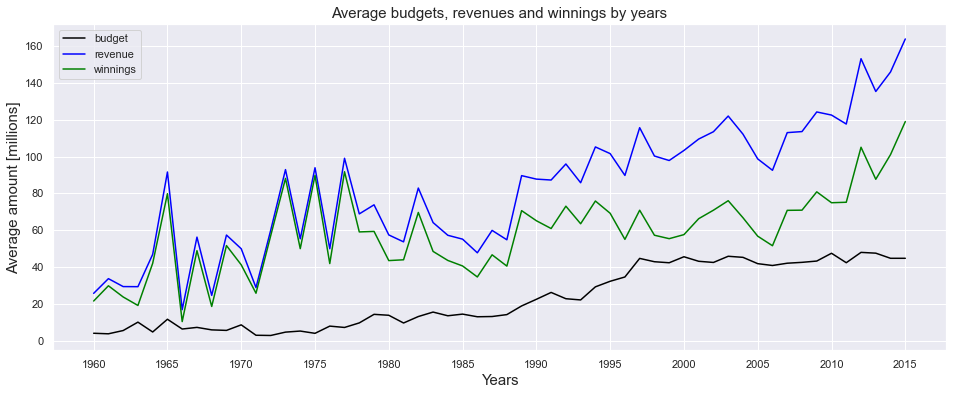

In [32]:
# calculate the average budgets, revenues & winnings by years:
## set the xticks in 5 years steps:
x_axis = np.arange(df['release_year'].min(), df['release_year'].max()+1, 5)

## create the plot:
df_years_budget = df.groupby('release_year')['budget'].mean().plot(color = 'black', xticks = x_axis, figsize = (16,6))
df_years_budget = df.groupby('release_year')['revenue'].mean().plot(color = 'blue')
df_years_budget = df.groupby('release_year')['winnings'].mean().plot(color = 'green')

# modify the title, labels and legend:
plt.title('Average budgets, revenues and winnings by years', fontsize = 15)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Average amount [millions]', fontsize = 15)
plt.legend();

As we can see, all 3 variables (budgets, revenues, winnings) rises up over the years.   
Only the budget keeps nearly the same level in the last few years of this diagram here. 

### Is there a correlation between budgets and revenues?

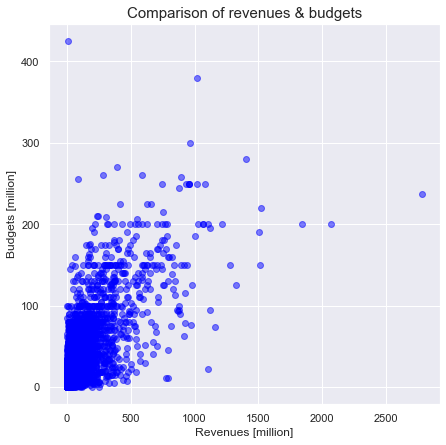

In [33]:
# compare the budgets with the revenues in a scatterplot:
##create the x and y values:
x = df['revenue']
y = df['budget']

## plot and edit the scatterplot regarding to title and labels:
plt.figure(figsize = (7,7))
plt.scatter(x, y, color = 'blue', alpha = 0.5)
plt.title('Comparison of revenues & budgets', fontsize = 15)
plt.xlabel('Revenues [million]', fontsize = 12)
plt.ylabel('Budgets [million]', fontsize = 12);

It seems like there is a little trend to recognize. With a higher budget, more revenue can be generated.   
  Note: To see it more clearly, I could use the least squares method (linear regression), but in this case of the Udacity project, it is not necessary as descriptive statistics will be covered in the next chapter of the Nanodegree.

### Is there a correlation between budgets and winnings?

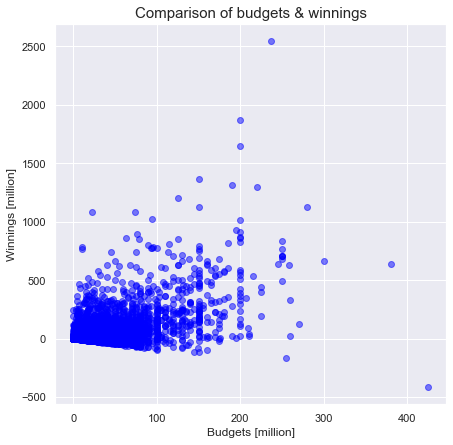

In [34]:
# compare from the movies the budget with the winnings in a scatterplot:
##create the x and y values:
x = df['budget']
y = df['winnings']

## plot and edit the scatterplot regarding to title and labels:
plt.figure(figsize = (7,7))
plt.scatter(x, y, color = 'blue', alpha = 0.5)
plt.title('Comparison of budgets & winnings', fontsize = 15)
plt.xlabel('Budgets [million]', fontsize = 12)
plt.ylabel('Winnings [million]', fontsize = 12);

Hm here it's also hard to say anything about the trend without using linear regression. So I will have a look at the next pairing between winnings and revenues

### Is there a correlation winnings and revenues?

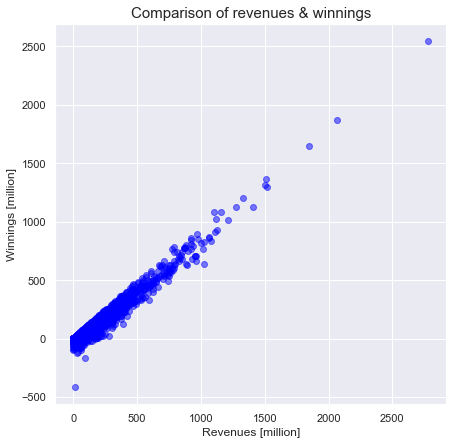

In [35]:
# compare the winnings with the revenues in a scatterplot:
##create the x and y values:
x = df['revenue']
y = df['winnings']

## plot and edit the scatterplot regarding to title and labels:
plt.figure(figsize = (7,7))
plt.scatter(x, y, color = 'blue', alpha = 0.5)
plt.title('Comparison of revenues & winnings', fontsize = 15)
plt.xlabel('Revenues [million]', fontsize = 12)
plt.ylabel('Winnings [million]', fontsize = 12);

Ok, now it's pretty clear. In this chart we can clearly see the positive linear trend and therefore the correlation between both variables.   
  Furthermore we can also see a pretty clear outlier, and that is our movie "The Warrior's Way" with a negative winning ammount of -413.912431 [millions]

**Conclusion to question 1:**   
- The films with the highest budget does not bring in automatically the highest revenues. Good example for that is the movie "The Warrior's Way".

- The correlation between higher revenues and winnings is pretty clear to see.

## Question 2: Does the genre of a movie affect it's running time?

### What are the average running times of films over the years?

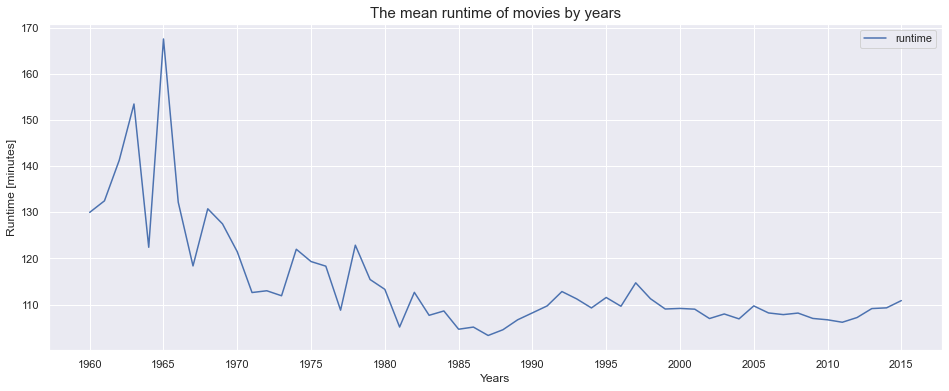

In [36]:
# plot the average runtime from movies by years:
## set the xticks in 5 years steps:
x_axis = np.arange(df['release_year'].min(), df['release_year'].max()+1, 5)

## create a linechart, grouped by relesease years and edit the title and labels:
df_years_runtime = df.groupby('release_year').agg({'runtime':'mean'}).plot(kind = 'line', xticks = x_axis, figsize = (16,6)) #try different coding style with agg
plt.title('The mean runtime of movies by years', fontsize = 15)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Runtime [minutes]', fontsize = 12);

In the early years, the length of the films increased to almost 170 minutes in the year 1965.   
  But then it dropped again to a good level of 110 minutes over the years

### How is the distribution of the genres regarding to the movies?

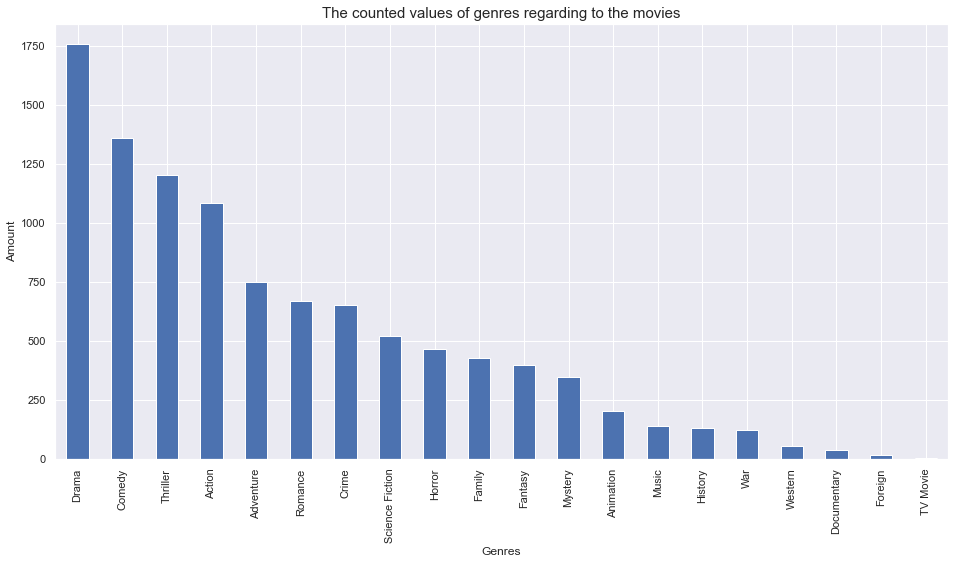

In [37]:
# split the genres from every movie and count it by each genre:
## split all genres from every movie and add them to an addiitonal tempory df:
df['genres_splitted'] = df['genres'].str.split('|')

df_explode_genres = df.explode('genres_splitted')
df_explode_genres.reset_index(drop = True, inplace = True)

## count the unique values of the tempory df:
df_expl_gen_count = df_explode_genres['genres_splitted'].value_counts()

## Create a bar chart by count values, sorted by amount:
df_expl_gen_count.sort_values(ascending = False).plot(kind ='bar', figsize = (16,8))
plt.title('The counted values of genres regarding to the movies', fontsize = 15)
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Amount', fontsize = 12);

The first place belongs to the genre "Drama", followed by "Comedy". This is a bit surprising for me, because I personally thought that genres like "Action", "Adventure" and also for example "Family" would be on the first places.   
  In addition, there is a special genre 'TV Movie', which is quite low. I would like to see, which movie belongs to this genre. 

In [38]:
#short insight of genre 'TV Movie':
df_explode_genres[df_explode_genres['genres_splitted'] == 'TV Movie']

,id,title,release_year,release_date,runtime,runtime_class,director,cast,genres,vote_average,rating_class,vote_count,vote_counts_class,revenue,budget,winnings,budget_class,production_companies,keywords,genres_splitted
8169,15691,Doctor Who,1996,1996-05-14,89,feature-length film,Geoffrey Sax,Paul McGann|Eric Roberts|Daphne Ashbrook|Sylve...,TV Movie|Adventure|Drama|Science Fiction,5.6,very low,35,not relevant,42.0,5.0,37.0,low,Universal TV|20th Century Fox Television|BBC W...,clock|time|time travel|millenium|space,TV Movie


It's just one movie of an old TV series called 'Doctor Who'. I know the series by name, but I have never seen it.

### What is the distribution of runtimes regarding to the different genres?

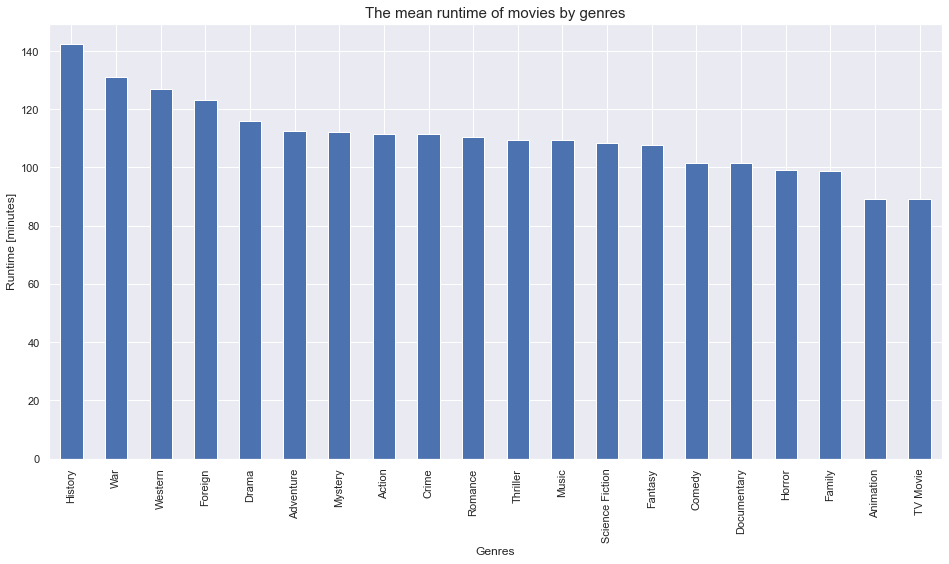

In [39]:
# Use the tempory df to calculate the means by each genre:
## create a bar chart by genres, sorted by runtime and edit the title and labels:
df_explode_genres.groupby('genres_splitted')['runtime'].mean().sort_values(ascending = False).plot(kind ='bar', figsize = (16,8))
plt.title('The mean runtime of movies by genres', fontsize = 15)
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Runtime [minutes]', fontsize = 12);

As we can see here, there is a different range of runtimes in terms of each genre.

**Conclusion question 2:**
- There is a range of different runtimes regarding to the specific genres.

- The highest average running times are found in the genres 'History', 'War' and 'Western'.

- Films with a shorter average running time are more often found in the genres 'Horror', 'Family', 'Animation' or 'TV Movie'.

## Question 3: Which specific genres brings the most winnings?  

### What are the budgets of movies by genres?

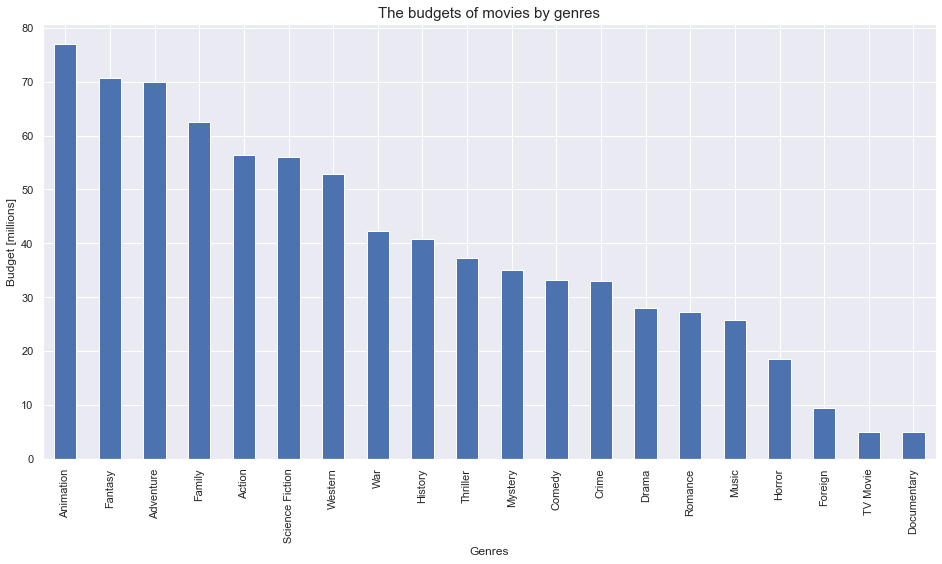

In [40]:
#Calculate the budgets by genres:
## use the already existing temporary df with exploded genres to calculate the budgets and plot it:
df_explode_genres.groupby('genres_splitted')['budget'].mean().sort_values(ascending = False).plot(kind='bar', figsize = (16,8))

## edit the title and labels:
plt.title('The budgets of movies by genres', fontsize = 15)
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Budget [millions]', fontsize = 12);

As we can see, the genre 'Animation' is at the first place in terms of budget.
This is not surprising, since the creation and rendering of animated movies requires an immense amount of computing and design maintenance. On the other hand with a very low budget is the genre 'Documentary'.

### What are the revenues of movies by genres?

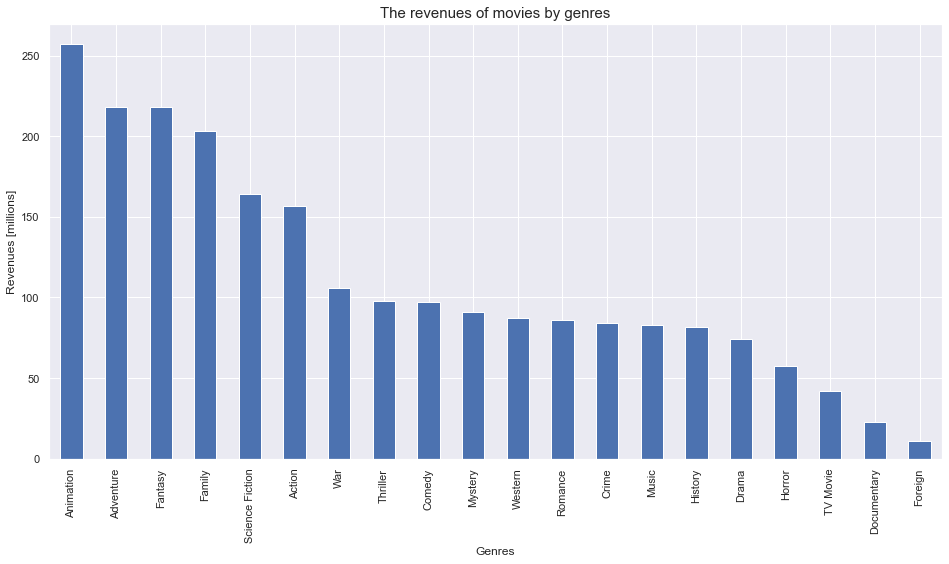

In [41]:
#Calculate the revenues by genres:
## use the already existing temporary df with exploded genres to calculate the revenues and plot it:
df_explode_genres.groupby('genres_splitted')['revenue'].mean().sort_values(ascending = False).plot(kind='bar', figsize = (16,8))

## edit the title and labels:
plt.title('The revenues of movies by genres', fontsize = 15)
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Revenues [millions]', fontsize = 12);

Here we can see, that some positions of the different genres have swapped their places in this diagram, if we compare it with the budget chart before.   
  But all in all, our statement regarding the correlation between budget and revenue in question 1 now becomes somewhat clearer.

### How big are the budgets and revenues of each movie by genres?

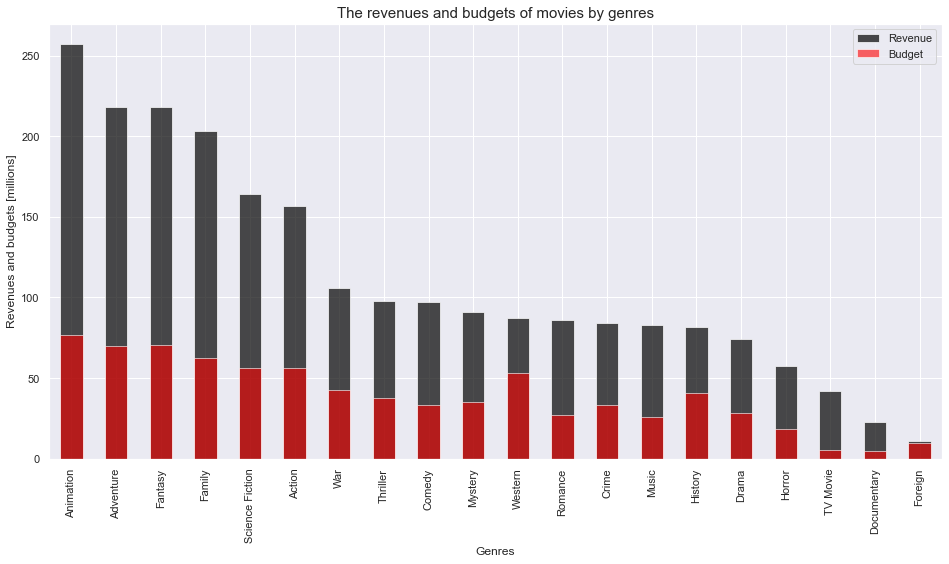

In [42]:
# create a bar chart, where all genres and their budgets overlap with revenues:
## create a bar chart by genre, sorted by revenue with their budgets and winnings:
df_expl_gen_mean = df_explode_genres.groupby('genres_splitted')[['revenue', 'budget', 'winnings']].mean().sort_values(by= ['revenue'],  ascending = False)

## plot both columns in an overlapping diagram:
df_expl_gen_mean['revenue'].plot(kind='bar', alpha = 0.7, color = 'black', label = 'Revenue', figsize = (16,8))
df_expl_gen_mean['budget'].plot(kind='bar', alpha = 0.6, color = 'red', label = 'Budget', figsize = (16,8))

## edit the title and labels:
plt.title('The revenues and budgets of movies by genres', fontsize = 15)
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Revenues and budgets [millions]', fontsize = 12)
plt.legend();

In a direct comparison of revenues and budgets, I'm also a little surprised at the big difference between these two variables.   
  And we're talking about numbers divided by a million here.   
    So that brings us to our next step and we already know what's coming.

### How big are the winnings and revenues of each movie by genres?

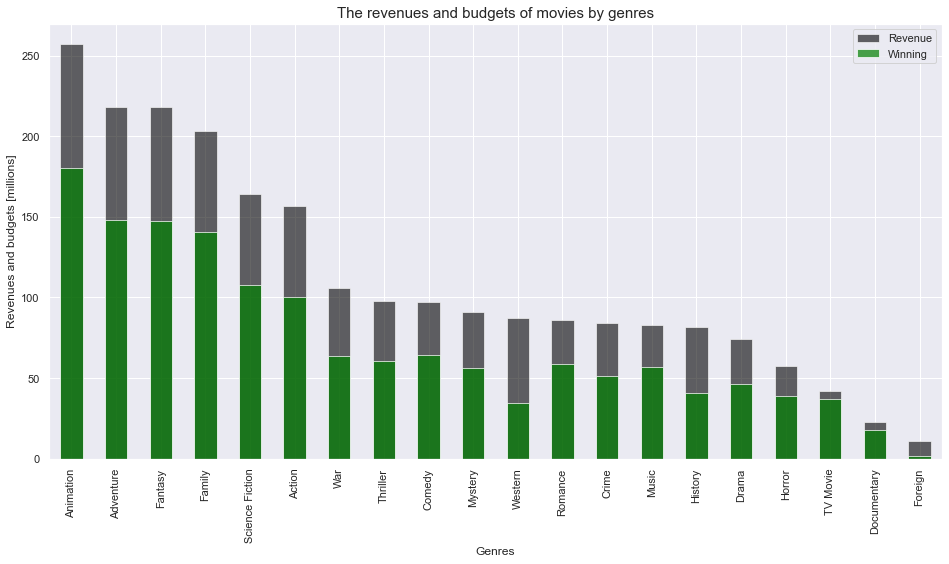

In [43]:
# create a bar chart, where all genres and their budgets overlap with winnings:
## plot both columns in an overlapping diagram:
df_expl_gen_mean['revenue'].plot(kind='bar', alpha = 0.6, color = 'black', label = 'Revenue', figsize = (16,8))
df_expl_gen_mean['winnings'].plot(kind='bar', alpha = 0.7, color = 'green', label = 'Winning', figsize = (16,8))

## edit the title and labels:
plt.title('The revenues and budgets of movies by genres', fontsize = 15)
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Revenues and budgets [millions]', fontsize = 12)
plt.legend();

In my personal opinion, it's pretty amazing to see these amounts of winnings here. This supports my opinion again regarding the genre 'Animation', that this movies are really very profitable.

What I'm also a little bit surprised about is the one movie in the genre 'TV Movie' again.  
  The percentage of winning in relation to revenue seems to be quite high. 

In [44]:
# percentage winning with the genre 'TV Movie' in relation to revenue:
## prepare both values and calculate it:
tv_revenue = float(df_explode_genres[df_explode_genres['genres_splitted'] == 'TV Movie']['revenue'])
tv_winning = float(df_explode_genres[df_explode_genres['genres_splitted'] == 'TV Movie']['winnings'])

percentage = tv_winning*100/tv_revenue

## print the result:
print('The percentage of profit in relation to revenue is {:.2f}% in the genre "TV Movie".'.format(percentage))

The percentage of profit in relation to revenue is 88.10% in the genre "TV Movie".


### Short summary - plotting a grouped bar chart with revenue, winning and budget:

,revenue,budget,winnings
genres_splitted,,,
Animation,257.121500,76.936473,180.185028
Adventure,218.291851,69.938913,148.352938
Fantasy,218.234134,70.717402,147.516733
Family,203.153547,62.479156,140.674391
Science Fiction,163.933127,55.986815,107.946311
Action,156.577157,56.440443,100.136714
War,106.032070,42.255840,63.776230
Thriller,97.740463,37.294600,60.445863
Comedy,97.336566,33.109057,64.227509


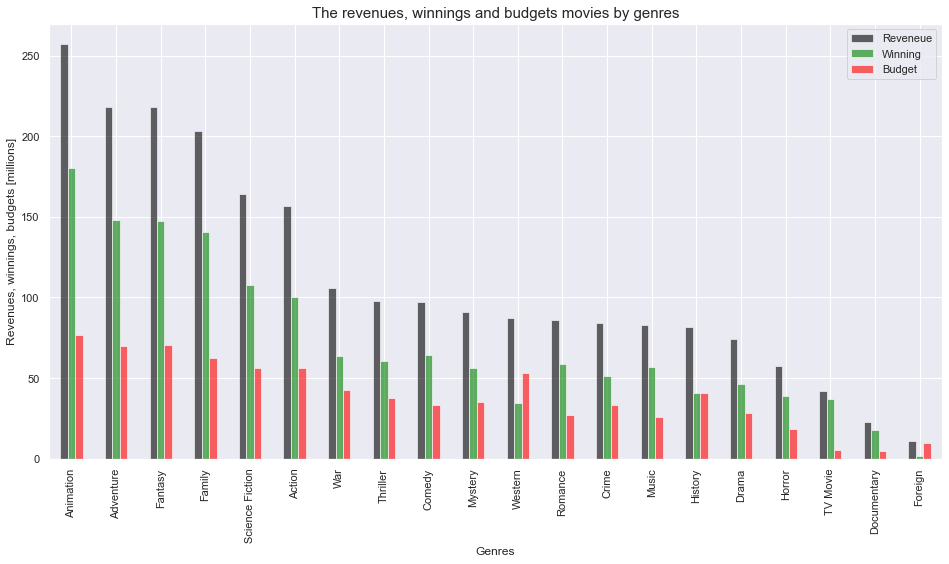

In [45]:
# little bonus - create a grouped bar chart regarding to revenues, winnings, budget:
## creating the grouped bar chart:
df_expl_gen_mean[['revenue', 'winnings','budget']].plot(kind='bar', alpha = 0.6, color = ['black', 'green','red'], figsize = (16,8))

## edit the title and labels:
plt.title('The revenues, winnings and budgets movies by genres', fontsize = 15)
plt.xlabel('Genres', fontsize = 12)
plt.ylabel('Revenues, winnings, budgets [millions]', fontsize = 12)
label = ['Reveneue', 'Winning', 'Budget']
plt.legend(label);

## shows the table above the chart:
df_expl_gen_mean

Here's a again short summary using a grouped bar chart.

### Does the revenues also got a strong correlation to winnings by movie genres?

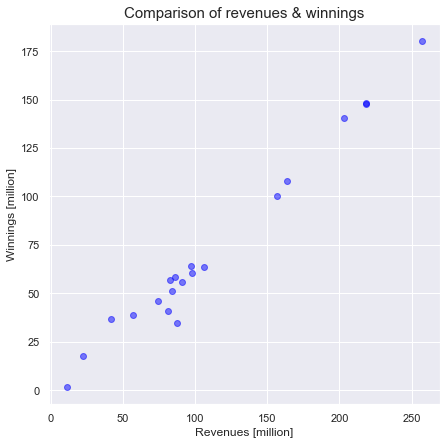

In [46]:
# compare the winnings with the revenue by genres in a scatterplot:
## create the x and y values:
x = df_explode_genres.groupby('genres_splitted')['revenue'].mean()
y = df_explode_genres.groupby('genres_splitted')['winnings'].mean()

## plot and edit the scatterplot regarding to title and labels:
plt.figure(figsize = (7,7))
plt.scatter(x, y, color = 'blue', alpha = 0.5)
plt.title('Comparison of revenues & winnings', fontsize = 15)
plt.xlabel('Revenues [million]', fontsize = 12)
plt.ylabel('Winnings [million]', fontsize = 12);

This is indeed the case. We can clearly see the same correlation as in question 1, but now with the averaging of revenues and winnings across different genres.

**Conlusion question 3:**
- The genre with the most winnings (180.18 Million) is 'Animation'. 

- We can clearly see the same correlation as in question 1, but now with the averaging of revenues and winnings across different genres.

## Bonus questions:

### What are the characteristics of the most casted actor?

#### What are the top 10 actors:

In [47]:
# figure out the top 10 actors:
## split the cast and count the values of the actors:
actors_splitted = pd.Series(df['cast'].str.cat(sep = '|').split('|'))
actor_counts = actors_splitted.value_counts(ascending = False)

## print the top 10 of the most casted actors in movies:
print('The top 10 favorite actors in the movies are:\n{}'.format(actor_counts.head(10)))

The top 10 favorite actors in the movies are:
Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Tom Hanks             34
Morgan Freeman        34
Sylvester Stallone    34
Brad Pitt             34
dtype: int64


The mosted casted actor is Robert De Niro.

#### Was he only in high-budget films during his career?

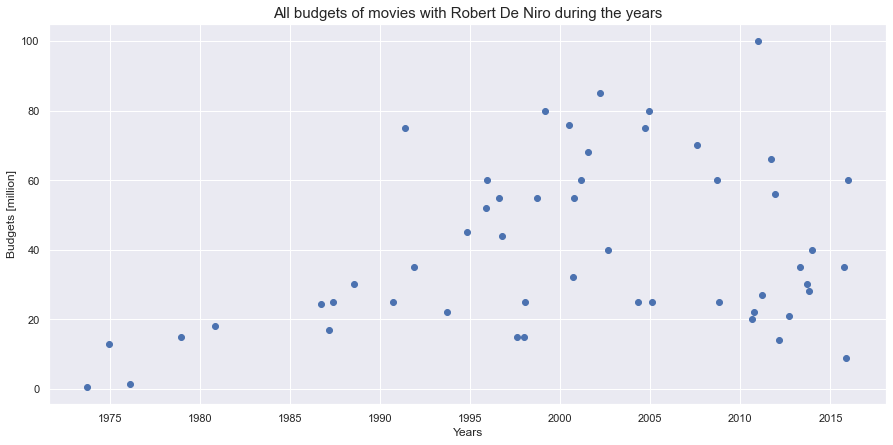

In [48]:
# create a scatterplot within all budgets of his movies during the years:
## split the Dataset by the cast, explode it and reset the index:
df['cast_splitted'] = df['cast'].str.split('|')
df_explode_cast = df.explode('cast_splitted')
df_explode_cast.reset_index(drop = True, inplace = True)

## prepare a filter for Robert De Niro:
De_Niro = df_explode_cast['cast_splitted'] == 'Robert De Niro'
df_1 = df_explode_cast[De_Niro]

## prepare and plot the result in a scatterplot:
x = df_1['release_date']
y = df_1['budget']

plt.figure(figsize = (15,7))
plt.scatter(x, y)

## edit the title and labels:
plt.title('All budgets of movies with Robert De Niro during the years', fontsize = 15)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Budgets [million]', fontsize = 12);

As we can see, Robert De Niro has acted throughout all different amount of budgets films until the end.

So let's see in which kind of different movie budget cases he acted the most:

The total amount of Robert De Niro movies are: 52

The sorted list of different movie budget classes are:
['low', 'middle', 'higher', 'premium']

The amount for each labels are:
[3, 11, 19, 19]

The percentages of each label are:
low : 5.77 %
middle : 21.15 %
higher : 36.54 %
premium : 36.54 %


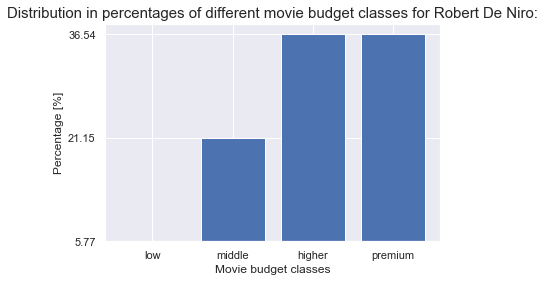

In [49]:
# calculate the percentages of the different budget classes for Robert De Niro:
## calculate the total amount of his movies and create a sorted list from low - premium:
total = df_1['title'].count()
list_budgets = ['low', 'middle', 'higher', 'premium']

print('The total amount of Robert De Niro movies are: {}\n'.format(total))
print('The sorted list of different movie budget classes are:\n{}\n'.format(list_budgets))


## iterate through the list_budgets to get the specific amount of each budget class:
results =[]
for i in list_budgets:
    results.append(df_1[df_1['budget_class'] == i]['title'].count())

print('The amount for each labels are:\n{}\n'.format(results))


## iterate the specific label results to calculate the percentage and round them up:
x = 0
percentages = []

for x in results:
    middle_step = x*100/total
    round(middle_step, 2)
    percentages.append(str(round(middle_step, 2)))

    
## create a dictionary, zip both lists together and print it:
final = dict(zip(list_budgets, percentages))

print('The percentages of each label are:')
for i in final:
    print(i ,':', final[i],'%')


## prepare the names and heights of the bar chart:
names = list(final.keys())
heights = list(final.values())


##plot and edit the bar chart:
plt.bar(names, heights, label = names)
plt.title('Distribution in percentages of different movie budget classes for Robert De Niro:', fontsize = 15)
plt.xlabel('Movie budget classes', fontsize = 12)
plt.ylabel('Percentage [%]', fontsize = 12);

Ok wow, it's quite the same percentage of 36.54% regarding to higher and also premium movies.

But to give it a better view at this stats, I will also plot it as an exploded pie chart:

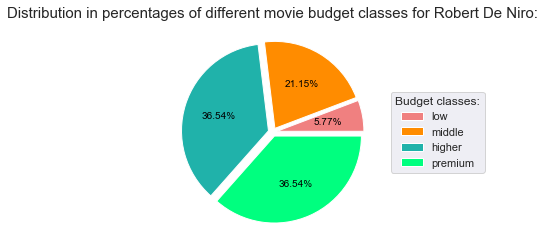

In [50]:
#plot also a pie chart for the result as a bonus view:

## prepare the names and values
names = list(final.keys())
values = list(final.values())

## bring in other colors and exploding values:
color = ['lightcoral', 'darkorange', 'lightseagreen', 'springgreen'] 
explode_values = (0.05 ,0.05 ,0.05 ,0.05) 

## plot the pie chart and edit the title, numbers, legend:
plt.pie(values, autopct='%1.2f%%', colors = color, explode = explode_values, textprops={'color':"black"})
plt.title('Distribution in percentages of different movie budget classes for Robert De Niro:', fontsize = 15)
plt.legend(title = 'Budget classes:', loc = 'right', labels = names, bbox_to_anchor=(1, 0, 0.5, 1));

 We can clearly see now, that Robert De Niro's focus was on higher and premium budget movies.

Note: For editing the exploded pie chart as an bonus view on top, I used documentation inputs of different sources which I linked below.   
  These are also notes for myself in the future:

[color table link](https://matplotlib.org/stable/gallery/color/named_colors.html)

[explode hint](https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/)

[numbers with clear amount of digits](https://stackoverflow.com/questions/44076203/getting-percentages-in-legend-from-pie-matplotlib-pie-chart)

[possible change of textcolor](https://stackoverflow.com/questions/27898830/python-how-to-change-autopct-text-color-to-be-white-in-a-pie-chart)

[moving legend labels](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.htmly)

#### What is the distribution of Robert De Niro's average votings for his movies?

Robert De Niro's average votings for his movies:
- The min of average votes:  4.00 
- The mean of average votes: 6.40 
- The max of average votes:  8.10 


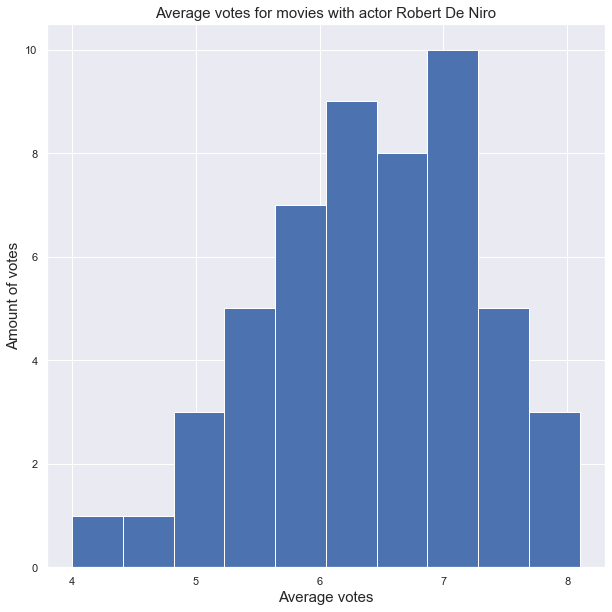

In [51]:
# average votings for movies with Robert De Niro:
## split the cast and create a new temporary df for it:
df['cast_splitted'] = df['cast'].str.split('|')
df_explode_cast = df.explode('cast_splitted')
df_explode_cast.reset_index(drop = True, inplace = True)

## prepare a filter for Robert De Niro:
De_Niro = df_explode_cast['cast_splitted'] == 'Robert De Niro'
df_1 = df_explode_cast[De_Niro]

## prepare, plot and edit the histogram:
df_1['vote_average'].hist(figsize =(10,10));
plt.title('Average votes for movies with actor Robert De Niro', fontsize=15)
plt.xlabel('Average votes', fontsize=15)
plt.ylabel('Amount of votes', fontsize=15);

## print his min, mean and mav average votes:
print("Robert De Niro's average votings for his movies:")
print('- The min of average votes:  {:.2f} '.format(df_1['vote_average'].min()))
print('- The mean of average votes: {:.2f} '.format(df_1['vote_average'].mean()))
print('- The max of average votes:  {:.2f} '.format(df_1['vote_average'].max()))

#### What are the mean average votings from Robert De Niro by different movie budget classes?

The mean average voting different budget classes of movies are: budget_class
low        6.766667
middle     6.727273
higher     6.447368
premium    6.100000
Name: vote_average, dtype: float64


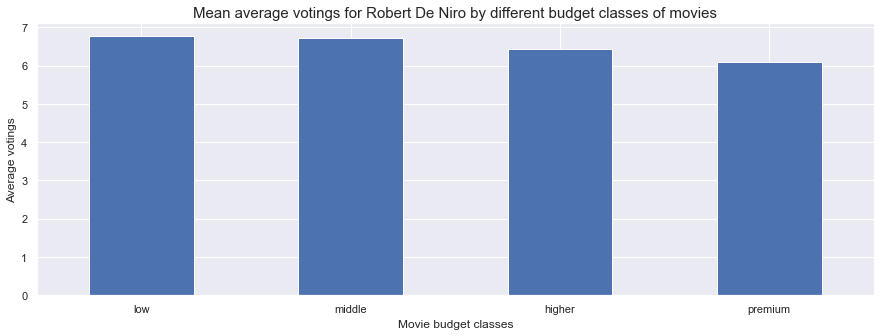

In [52]:
# Mean average votings for Robert De Niro by different budget classes of movies:
## show the average votings for each budget class:
df_1_budget_voting = (df_1.groupby('budget_class').vote_average.mean())
print('The mean average voting different budget classes of movies are: {}'.format(df_1_budget_voting))

## create a bar chart sorted by budget, grouped by budget class and calculated the mean average voting:
df_1.sort_values('budget').groupby('budget_class').vote_average.mean().plot(kind = 'bar', figsize = (15,5))

## edit the title and labels:
plt.title('Mean average votings for Robert De Niro by different budget classes of movies', fontsize = 15)
plt.xticks(rotation = 0)
plt.xlabel('Movie budget classes', fontsize = 12)
plt.ylabel('Average votings', fontsize = 12);

**Conclusion regarding to Robert de Niro:**
- He is the actor with the most movies (52) in this datasset.
- He has acted throughout all different amount of budgets films until the end.
- But his focus has been on higher budget and also premium movies with the same percentage of 36.54%.
- The average vote ranges from a minimum of 4.00 to an average of 6.40 to a maximum of 8.10.
- The average rating in each budget class ranges from low 6.77 to medium 6.72 to higher 6.44 and finally to premium 6.1.

## Finally, here are some further general questions with short answers at the end:

### What is the distribution of movie runtimes within their runtime labels?

In [53]:
# distribution of the films according to their lenghts:
## count the runtime_classes
runtime_counts = df['runtime_class'].value_counts()

## print the counted results:
print('Distribution of the films according to their lenghts:\n{}\n'.format(runtime_counts))

Distribution of the films according to their lenghts:
feature-length film    2966
over-length film        885
short film                2
medium-length film        1
Name: runtime_class, dtype: int64



In [54]:
# create a bonus function for some example charts, to plot every value in a bar chart later:   
## edited the range and y_list[i] from the original code:
def add_value_label(x_list,y_list):
    for i in range(len(x_list)):
        plt.text(i,y_list[i],y_list[i], ha="center")

Note: Used the source code above from this [link](https://www.delftstack.com/howto/matplotlib/add-value-labels-on-matplotlib-bar-chart/)    
  These is also a note for myself in the future.


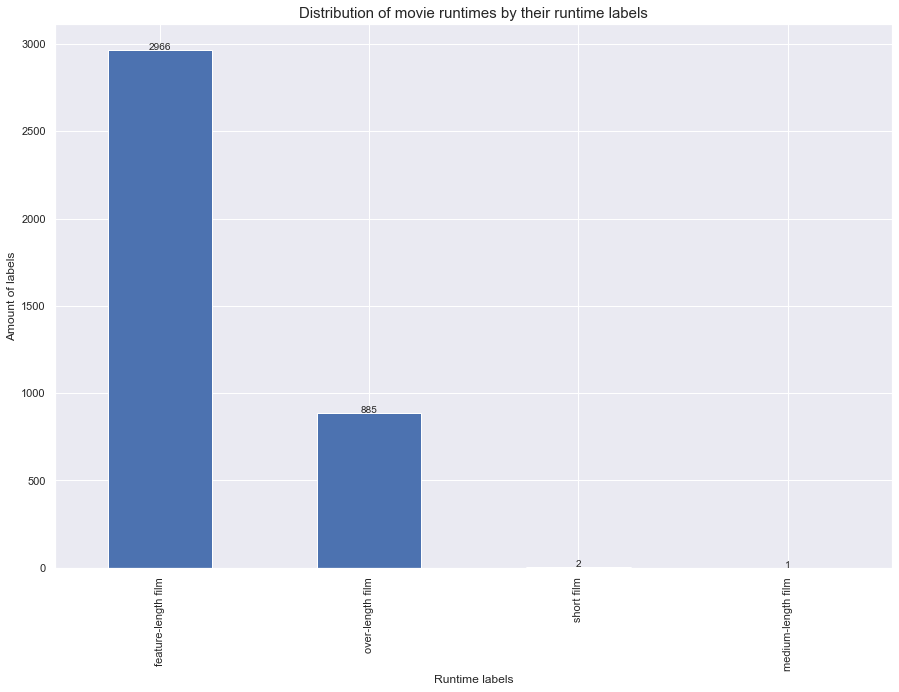

In [55]:
# create a bar chart for that and change the title and labels:
## prepare labels and heights for numbers in plot later:
runtime_labels = df['runtime_class'].unique()
runtime_heights = runtime_counts

## plot the bar chart and eddit the title and labels:
runtime_counts.plot(kind = 'bar', figsize = (15,10))
plt.title('Distribution of movie runtimes by their runtime labels', fontsize=15)

plt.xlabel('Runtime labels', fontsize = 12)
plt.ylabel('Amount of labels', fontsize = 12)

## bring in the numbers in the plottet bar chart by the bonus function:
add_value_label(runtime_labels, runtime_heights);

### What is the distribution of movie voting counts labels?

In [56]:
# distribution of ratings classes:
## count the rating classes and print it:
ratings_counts = df['rating_class'].value_counts()

print('Distribution of the ratings classes:\n{}\n'.format(ratings_counts))

Distribution of the ratings classes:
very low    1104
low          940
medium       907
high         903
Name: rating_class, dtype: int64



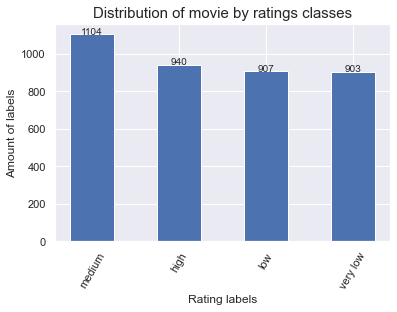

In [57]:
## prepare labels and heights for numbers in plot later:
rating_labels = df['rating_class'].unique()
rating_heights = ratings_counts

## plot the bar chart and eddit the title and labels:
plt.bar(rating_labels, rating_heights, width = 0.5)

plt.title('Distribution of movie by ratings classes', fontsize = 15)
plt.xticks(rotation = 60)
plt.xlabel('Rating labels', fontsize = 12)
plt.ylabel('Amount of labels', fontsize = 12)

## bring in the numbers in the plottet bar chart by the bonus function:
add_value_label(rating_labels, rating_heights);

### What is the distribution of rating classes groubpy counted votes? 

In [58]:
# distribution of ratings groupby counted votes:
## groupby voted counts classes and vote rating classes. Count it with an alternative coding style using agg.:
ratings_groupby_votes = df.groupby(['vote_counts_class','rating_class']).agg({'title':'count'})

## print the result:
print('Distribution of rating classes groupby counted votes:\n{}\n'.format(ratings_groupby_votes))

Distribution of rating classes groupby counted votes:
                                title
vote_counts_class rating_class       
not relevant      very low        417
                  low             244
                  medium          207
                  high            101
few               very low        336
                  low             239
                  medium          229
                  high            156
middle            very low        257
                  low             275
                  medium          219
                  high            211
many              very low         94
                  low             182
                  medium          252
                  high            435



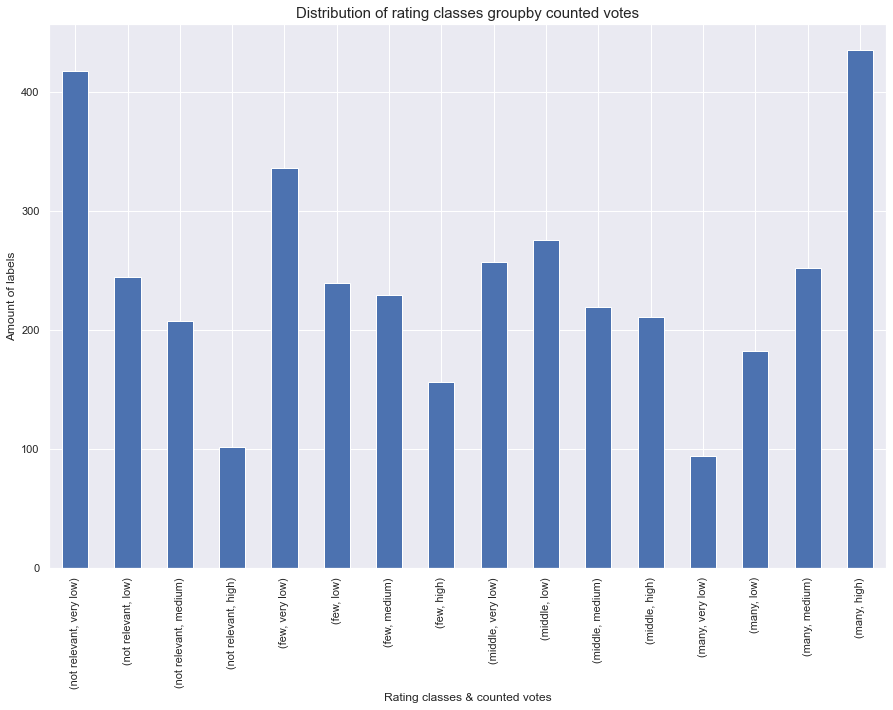

In [59]:
## plot the results from above:
ratings_groupby_votes.plot(kind = 'bar', legend = None, figsize = (15,10))

## edit the title and the labels: 
plt.title('Distribution of rating classes groupby counted votes',fontsize = 15)
plt.xlabel('Rating classes & counted votes', fontsize = 12)
plt.ylabel('Amount of labels', fontsize = 12);

### Who are the top 20 production companies of movies with "many" counted votes and a "premium" budget? 

In [60]:
# find the top 20 production companies with labels "many" & "premium":
## create the query with vote_count_label "many" & budget_level "premium":
df_many_premium = df.query('vote_counts_class == "many" & budget_class == "premium"')

##print the headline:
print('The top 20 production companies with "many" as counted vote label and "premium" as budget label:')

## split the queried dataframe by production companies, explode them, count the values and show the top 20 list:
df_many_premium['production_companies'].str.split('|').explode('production_companies').value_counts().head(20)

The top 20 production companies with "many" as counted vote label and "premium" as budget label:


Warner Bros.                              76
Universal Pictures                        61
Paramount Pictures                        50
Twentieth Century Fox Film Corporation    49
Columbia Pictures                         46
Walt Disney Pictures                      45
DreamWorks SKG                            28
Legendary Pictures                        26
Relativity Media                          26
Village Roadshow Pictures                 24
DreamWorks Animation                      22
Amblin Entertainment                      22
Dune Entertainment                        19
Jerry Bruckheimer Films                   16
New Line Cinema                           16
Pixar Animation Studios                   15
Original Film                             14
Touchstone Pictures                       14
Scott Free Productions                    13
Columbia Pictures Corporation             13
Name: production_companies, dtype: int64

<a id='conclusions'></a>
# Conclusions

## Limitation:

- There are a large number of zeros in the Cast, Director, Keywords, Genre and Production Companies columns where they have been replaced with the word "Unknown" to save as much data as possible with budget or revenue.

- Movies with 0 budget (54.43%), 0 revenue (55.37%) or with 0 runtime (0.29%) simply make a huge amount of useless data. For this reason, only 35.47% of the data rows are left (not counting duplicate rows). Under real conditions I would search for another dataset to fill in the missing data via join.

So with this limitations, only 3854 rows remain in the cleaned dataset. This is not as representative as the old data set, but on the other hand, the old data set would have had a large impact on various statements and results. 

## Conclusion to each main question:

**Question 1:**   
- The films with the highest budget does not bring in automatically the highest revenues. Good example for that is the movie "The Warrior's Way".

- The correlation between higher revenues and winnings is pretty clear to see.


**Question 2:**   
- There is a range of different runtimes regarding to the specific genres.

- The highest average running times are found in the genres 'History', 'War' and 'Western'.

- Films with a shorter average running time are more often found in the genres 'Horror', 'Family', 'Animation' or 'TV Movie'.


**Question 3:**   
- The genre with the most winnings (180.18 Million) is 'Animation'. 

- We can clearly see the same correlation as in question 1, but now with the averaging of revenues and winnings across different genres.

**Bonus Question with Robert de Niro:**
- He is the actor with the most movies (52) in this datasset.

- He has acted throughout all different amount of budgets films until the end.

- But his focus has been on higher budget and also premium movies with the same percentage of 36.54%.

- The average vote ranges from a minimum of 4.00 to an average of 6.40 to a maximum of 8.10.

- The average rating in each budget class ranges from low 6.77 to medium 6.72 to higher 6.44 and finally to premium 6.1.

## Created by Stefan Menauer